In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: price
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['price'].max()
Min = Amsterdam['price'].min()
Limites = [Min, Max]
Limites

[66.0, 424.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

358.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

25.15816122301031

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (66, 424, 15)
intervalos

array([ 66.        ,  91.57142857, 117.14285714, 142.71428571,
       168.28571429, 193.85714286, 219.42857143, 245.        ,
       270.57142857, 296.14285714, 321.71428571, 347.28571429,
       372.85714286, 398.42857143, 424.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Amsterdam['price'] = pd.cut ( x = Amsterdam ['price'], bins = intervalos, labels = categorias )
Amsterdam['price']

0        Categoria9
1        Categoria9
2        Categoria9
3        Categoria9
4        Categoria9
           ...     
9654     Categoria3
9655     Categoria6
9656    Categoria14
9657    Categoria12
9658    Categoria13
Name: price, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [12]:
table1 = freq_tbl(Amsterdam['price'])
table1

,price,frequency,percentage,cumulative_perc
0,Categoria9,4154,0.430065,0.430243
1,Categoria8,1196,0.123822,0.554117
2,Categoria6,649,0.067191,0.621336
3,Categoria5,558,0.057770,0.679130
4,Categoria4,550,0.056942,0.736095
5,Categoria7,509,0.052697,0.788814
6,Categoria3,396,0.040998,0.829829
7,Categoria10,361,0.037374,0.867219
8,Categoria2,311,0.032198,0.899430
9,Categoria12,252,0.026090,0.925531


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,price,frequency
0,Categoria9,4154
1,Categoria8,1196
2,Categoria6,649
3,Categoria5,558
4,Categoria4,550
5,Categoria7,509
6,Categoria3,396
7,Categoria10,361
8,Categoria2,311
9,Categoria12,252


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('price')
Filtro_index

,frequency
price,
Categoria9,4154
Categoria8,1196
Categoria6,649
Categoria5,558
Categoria4,550
Categoria7,509
Categoria3,396
Categoria10,361
Categoria2,311


Text(0, 0.5, 'Frecuencia')

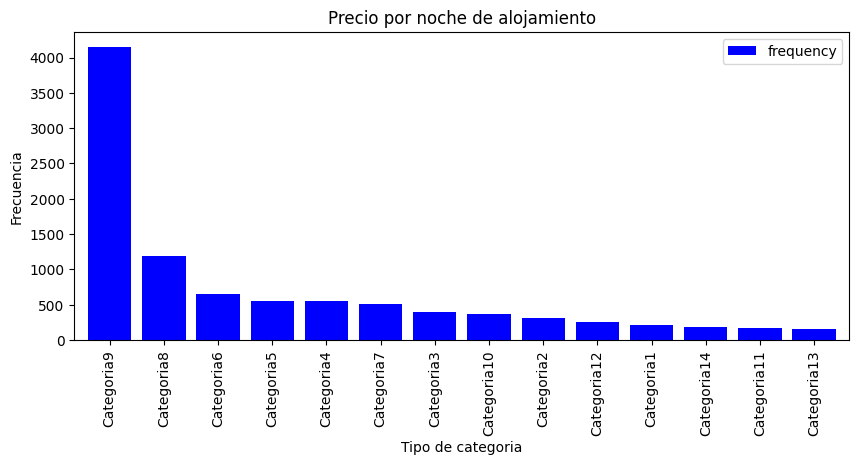

In [16]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Precio por noche de alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')